Silly little script to plot gradient and segmented reference curves

#66=IfcCompositeCurve((#67,#80,#93,#106,#119,#132,#145),.F.)
#333=IfcCompositeCurve((#334,#347,#360,#373,#386,#399,#412,#425,#438,#451,#464,#477),.F.)
#657=IfcCompositeCurve((#658,#671,#684,#697,#710,#723,#736,#749,#762),.F.)
#153=IfcGradientCurve((#154,#167,#179,#192,#204,#217,#229,#242),.F.,#66,#258)
#485=IfcGradientCurve((#486,#499,#511,#524,#536,#548,#561,#573),.F.,#333,#589)
#770=IfcGradientCurve((#771,#784,#796,#809,#821,#834,#846,#859,#871),.F.,#657,#887)


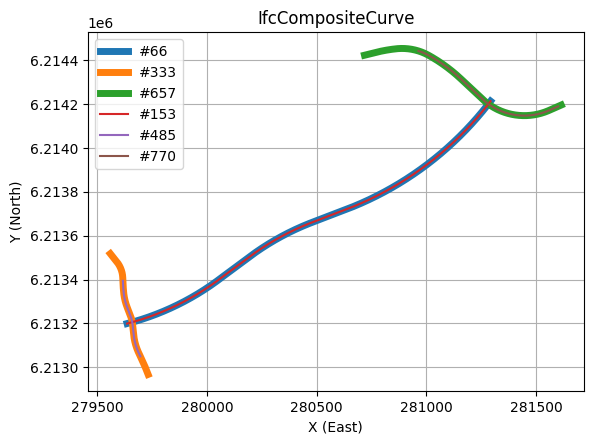

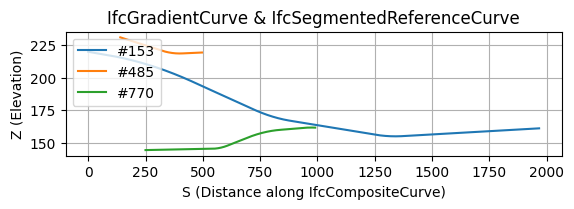

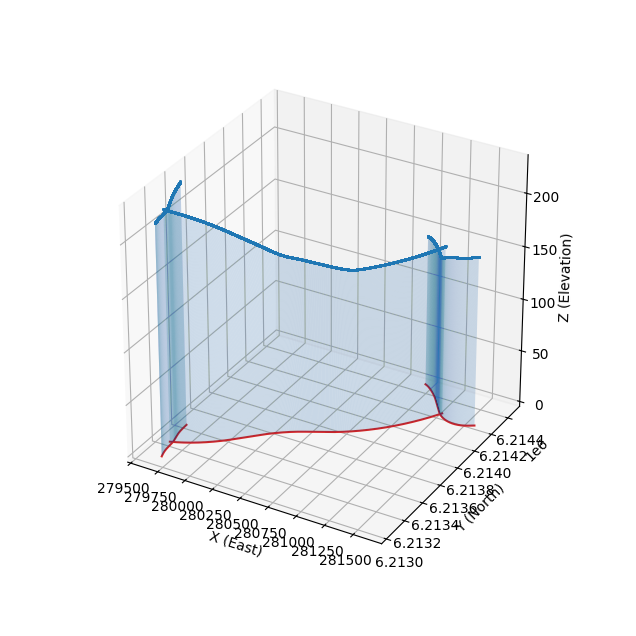

In [3]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

#model = ifcopenshell.open("F:/IfcOpenShell/_build-vs2022-x64/examples/FHWA_Bridge_Geometry_Alignment_Example.ifc")
model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/Alignment_only_v1.ifc")

settings = geom.settings()

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure(figsize=(8,8)).add_subplot(projection="3d")

hcurves = model.by_type("IfcCompositeCurve",False)
for hc in hcurves:
    print(hc)
    shape = geom.create_shape(settings,hc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    fig1.plot(x,y,linewidth=5,label="#" + str(hc.id()))
    



curves = model.by_type("IfcGradientCurve",False) + model.by_type("IfcSegmentedReferenceCurve",False)
for curve in curves:
    print(curve)
    pwf = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,curve.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.piecewise_function_evaluator(pwf)
    distances = evaluator.evaluation_points()
    #distances = pwf.evaluation_points()
    
    shape = geom.create_shape(settings,curve)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    
    fig1.plot(x,y,label="#" + str(curve.id()))
    fig2.plot(distances,z,label="#" + str(curve.id()))
    
    markerline, stemline, baseline = fig3.stem(x,y,z)
    plt.setp(stemline,linewidth=0.01)
    plt.setp(stemline,linestyles="dashed")
    plt.setp(markerline,markersize=1)

    
fig1.set_title("IfcCompositeCurve")
fig1.legend(loc="upper left")
#fig1.axis("square")
fig1.set_aspect('equal',adjustable='box')
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)

fig2.set_title("IfcGradientCurve & IfcSegmentedReferenceCurve")
fig2.legend(loc="upper left")
fig2.set_xlabel("S (Distance along IfcCompositeCurve)")
fig2.set_ylabel("Z (Elevation)")
fig2.set_box_aspect(0.25)
fig2.grid(True)

#fig3.set_title("IfcGradientCurve")
#fig3.legend()
#fig3.axis("square")
fig3.set_xlabel("X (East)")
fig3.set_ylabel("Y (North)")
fig3.set_zlabel("Z (Elevation)")
fig3.grid(True)
fig3.set_box_aspect([1,1,1],zoom=0.8)
#fig3.set_box_aspect(aspect=None,zoom=0.8)

#plt.savefig("Alignment.png")
plt.show()
